In [1]:
%matplotlib inline

import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
import glob

In [2]:
IMAGE_SIZE = 224

In [3]:
img_dir = "D:/Computer Vision/data/car_license/images"
data_path = os.path.join(img_dir, "*g")
files = glob.glob(data_path)
files.sort()
X = []
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    X.append(np.array(img))

In [4]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [5]:
path = "D:/Computer Vision/data/car_license/annotations"
text_files = ["D:/Computer Vision/data/car_license/annotations/"+f for f in sorted(os.listdir(path))]
y = []
for i in text_files:
    y.append(resizeannotation(i))

In [6]:
resizeannotation("D:/Computer Vision/data/car_license/annotations/Cars0.xml")

[187, 144, 101, 104]

In [7]:
y[0]

[187, 144, 101, 104]

In [8]:
np.array(X).shape

(433, 224, 224, 3)

In [9]:
np.array(y).shape

(433, 4)

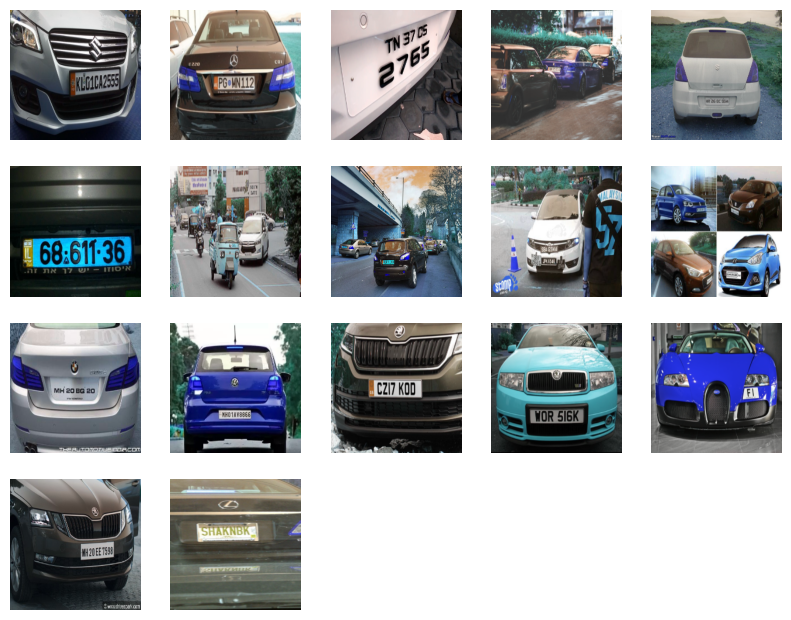

In [10]:
plt.figure(figsize=(10,20))
for i in range(0,17):
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

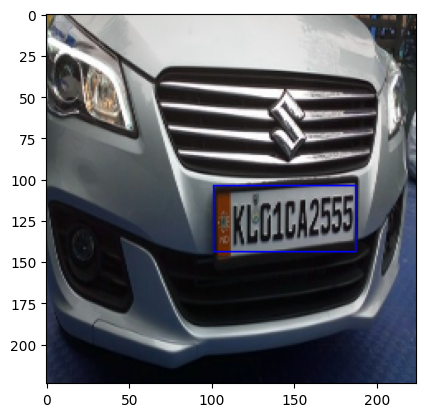

In [11]:
# We can draw the rectangle containing the license plate using the OpenCV library

image = cv2.rectangle(X[0], (y[0][0], y[0][1]), (y[0][2], y[0][3]), (0, 0, 255))
plt.imshow(image)
plt.show()

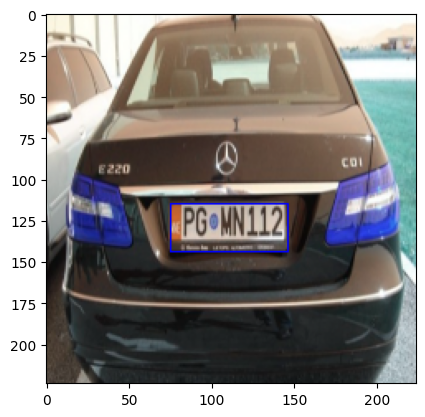

In [12]:
image = cv2.rectangle(X[1], (y[1][0], y[1][1]), (y[1][2], y[1][3]), (0, 0, 255))
plt.imshow(image)
plt.show()

In [13]:
# We prepare the data for the CNN

X = np.array(X) 
y = np.array(y) 

In [14]:
# Renormalization
X = X/255.0
y = y/255.0

In [15]:
# We split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [19]:
# Convolutional Neural Network 
# Model1: 2 Convolutional Layers + 2 Dense Layers

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

model1 = Sequential()
model1.add(Conv2D(64, (3,3), input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Dropout(0.1))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(4, activation='sigmoid'))

model1.compile(loss='mean_squared_error' , optimizer=Adam(lr=0.001), metrics=['accuracy'])

model1.summary()

SyntaxError: invalid syntax (pywrap_tensorflow_internal.py, line 114)